In [1]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from bayes_opt import BayesianOptimization
from sklearn.metrics import mean_squared_error
import numpy as np
from pandas import read_csv
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#from matplotlib import pyplot
#import matplotlib.pyplot as plt
from lib_ocsvm.unsupervised_rules import ocsvm_rule_extractor
import xai
import xai.data

# https://github.com/EthicalML/xai/blob/master/examples/XAI%20Tabular%20Data%20Example%20Usage.ipynb

In [4]:
data = pd.read_csv('./COVID19ML-master/UsedCombined.txt',sep='\t')
data = data.drop(columns = ['Unnamed: 0'])

#removeList = ['Sex','neutrophilCategorical','serumLevelsOfWhiteBloodCellCategorical','lymphocytesCategorical','CTscanResults','XrayResults','Diarrhea','Fever','Coughing','SoreThroat','NauseaVomitting','Fatigue','RenalDisease','diabetes']
removeList = ['neutrophilCategorical','serumLevelsOfWhiteBloodCellCategorical','lymphocytesCategorical']

#for i in removeList:  #create sparse matrix
#    data = pd.concat([data,pd.get_dummies(data[i], prefix=i)],axis=1)

data = data.drop(columns=removeList)
data= data.drop(columns = ['Diagnosis'])
#data= data.drop(columns = [ 'neutrophil','serumLevelsOfWhiteBloodCell','lymphocytes','Fatigue', 'RenalDisease', 'diabetes','CTscanResults', 'XrayResults', 'Diarrhea'])

#numerical_cols = [ 'Age', 'Temperature']
numerical_cols = [ 'Age', 'neutrophil', 'serumLevelsOfWhiteBloodCell', 'lymphocytes','Temperature']

categorical_cols = [x for x in list(data.columns[1:]) if x not in numerical_cols] #all the others are categorical
print("categorical_cols", categorical_cols)


le = preprocessing.LabelEncoder()
for i in categorical_cols:
    data[i]  = data[i].str.strip() #remove space
    data[i]  = data[i].fillna('NaN') #remove NaN
    data[i] = le.fit_transform(data[i])
    print(i, list(le.classes_))


X, y = data.iloc[:,1:],data.iloc[:,0]

data

categorical_cols ['Sex', 'CTscanResults', 'XrayResults', 'Diarrhea', 'Fever', 'Coughing', 'SoreThroat', 'NauseaVomitting', 'Fatigue', 'RenalDisease', 'diabetes']
Sex ['F', 'M', 'NaN']
CTscanResults ['Inconclusive', 'NaN', 'Neg', 'Pos', 'neg']
XrayResults ['NaN', 'Neg', 'Pos']
Diarrhea ['NaN', 'No', 'Yes']
Fever ['NaN', 'No', 'Yes']
Coughing ['NaN', 'No', 'Yes']
SoreThroat ['NaN', 'No', 'Yes']
NauseaVomitting ['NaN', 'No', 'Yes']
Fatigue ['NaN', 'No', 'Yes']
RenalDisease ['NaN', 'No', 'Yes']
diabetes ['NaN', 'No', 'Yes']


,D,Age,Sex,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CTscanResults,XrayResults,Diarrhea,Fever,Coughing,SoreThroat,NauseaVomitting,Temperature,Fatigue,RenalDisease,diabetes
0,0,67.000,0,NaN,NaN,NaN,1,0,0,2,2,1,0,38.111111,1,0,0
1,0,29.000,1,NaN,NaN,NaN,1,0,0,0,0,0,0,NaN,0,0,0
2,0,22.000,0,NaN,NaN,NaN,1,0,0,0,0,0,0,NaN,0,0,0
3,0,20.000,0,NaN,NaN,NaN,1,0,0,2,2,1,0,36.555556,2,1,1
4,0,21.000,1,NaN,NaN,NaN,1,0,0,0,0,0,0,NaN,0,0,0
5,0,22.000,0,NaN,NaN,NaN,1,0,0,0,0,0,0,NaN,0,0,0
6,0,19.000,0,NaN,NaN,NaN,1,0,0,0,0,0,0,NaN,0,0,0
7,0,60.000,1,NaN,NaN,NaN,1,0,0,1,2,1,0,38.166667,1,2,1
8,0,46.000,0,NaN,NaN,NaN,1,0,0,2,2,1,0,38.611111,1,0,0
9,0,18.000,1,NaN,NaN,NaN,1,0,0,0,0,0,0,NaN,0,0,0


In [2]:

# data = pd.read_csv('./COVID19ML-master/UsedCombined.txt',sep='\t')
# data = pd.read_csv('small records.csv',sep=',')
data = pd.read_csv('mexico_final.csv',sep=',')
# data = data.drop(columns = ['Unnamed: 0'])

#removeList = ['Sex','neutrophilCategorical','serumLevelsOfWhiteBloodCellCategorical','lymphocytesCategorical','CTscanResults','XrayResults','Diarrhea','Fever','Coughing','SoreThroat','NauseaVomitting','Fatigue','RenalDisease','diabetes']
# removeList = ['neutrophilCategorical','serumLevelsOfWhiteBloodCellCategorical','lymphocytesCategorical']
# removeList = ['age_original','DateOfOnsetSymptoms','ID' ,'Latitude', 'Longitude']
# removeList = ['FECHA_INGRESO', 'FECHA_SINTOMAS','FECHA_DEF']
removeList = ['id', 'covid_res','entry_date','date_symptoms','date_died', 'contact_other_covid', 'pregnancy']
data = data.drop(columns=removeList)
data = data.rename(columns={"inmsupr":"immunosuppression", "patient_type":"hospitalized"})

#for i in removeList:  #create sparse matrix
#    data = pd.concat([data,pd.get_dummies(data[i], prefix=i)],axis=1)


# data= data.drop(columns = ['Diagnosis'])
#data= data.drop(columns = [ 'neutrophil','serumLevelsOfWhiteBloodCell','lymphocytes','Fatigue', 'RenalDisease', 'diabetes','CTscanResults', 'XrayResults', 'Diarrhea'])

numerical_cols = [ 'age']
# numerical_cols = [ 'Age', 'neutrophil', 'serumLevelsOfWhiteBloodCell', 'lymphocytes','Temperature']
# numerical_cols = [ 'Age','serumLevelsOfWhiteBloodCell', 'Temperature']

categorical_cols = [x for x in list(data.columns) if x not in numerical_cols] #all the others are categorical
print("categorical_cols", categorical_cols)


# le = preprocessing.LabelEncoder()
# for i in categorical_cols:
#     data[i]  = data[i].str.strip() #remove space
#     data[i]  = data[i].str.lower() #remove space
#     data[i]  = data[i].fillna('NaN') #remove NaN
#     data[i] = le.fit_transform(data[i])
#     print(i, list(le.classes_))


X, y = data.iloc[:,1:],data.iloc[:,0]

X

categorical_cols ['death', 'sex', 'hospitalized', 'intubed', 'pneumonia', 'diabetes', 'copd', 'asthma', 'immunosuppression', 'hypertension', 'other_disease', 'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'icu']


,sex,hospitalized,intubed,pneumonia,age,diabetes,copd,asthma,immunosuppression,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,icu
0,1,2,2,2,25,2,2,2,2,2,2,2,2,2,2,2
1,2,1,97,1,56,2,2,2,2,2,2,2,2,2,2,97
2,2,1,97,2,44,2,2,2,2,2,2,2,2,2,2,97
3,2,1,97,2,33,2,2,2,2,2,2,2,2,2,2,97
4,1,1,97,2,57,2,2,2,2,2,2,2,1,2,2,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9446,2,1,97,2,32,2,2,2,2,2,2,2,2,2,2,97
9447,2,2,2,2,57,2,2,2,2,2,2,2,2,2,2,2
9448,1,1,97,2,33,2,2,2,2,2,2,2,2,2,2,97
9449,2,1,97,2,37,2,2,2,2,2,2,1,2,2,2,97


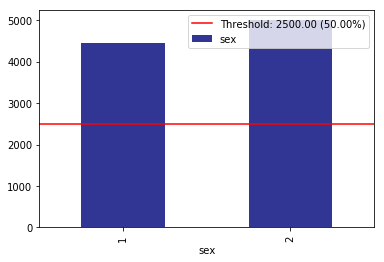

In [3]:
groups = xai.imbalance_plot(data, "sex",categorical_cols=categorical_cols)

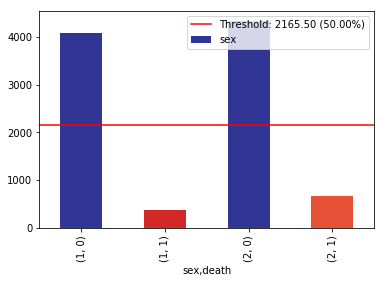

In [7]:
groups = xai.imbalance_plot(data, "sex", "death", categorical_cols=categorical_cols)

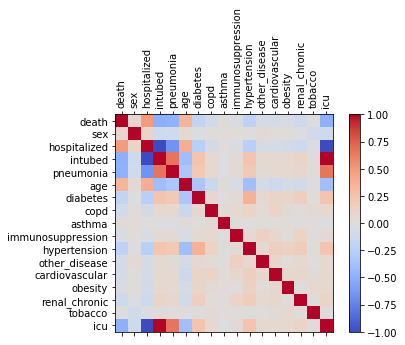

In [9]:
_ = xai.correlations(data, include_categorical=True, plot_type="matrix")

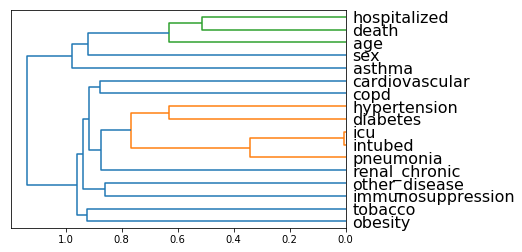

In [6]:
x = xai.correlations(data, include_categorical=True)

In [7]:
data.columns

Index(['death', 'sex', 'hospitalized', 'intubed', 'pneumonia', 'age',
       'diabetes', 'copd', 'asthma', 'immunosuppression', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'icu'],
      dtype='object')

In [13]:
df = pd.DataFrame(data=x, index=data.columns, columns=data.columns)

In [14]:
df

,death,sex,hospitalized,intubed,pneumonia,age,diabetes,copd,asthma,immunosuppression,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,icu
death,1.000000,0.079292,0.486732,-0.498213,-0.477499,0.346894,-0.182359,-0.083202,0.023831,-0.038081,-0.216417,-0.055763,-0.065948,-0.035921,-0.113715,-0.002951,-0.488383
sex,0.079292,1.000000,0.104043,-0.105607,-0.081005,0.053943,-0.011706,0.007990,0.031456,0.020599,-0.002776,0.039841,0.004843,0.019430,-0.016672,-0.087806,-0.105288
hospitalized,0.486732,0.104043,1.000000,-0.996663,-0.654922,0.392624,-0.246005,-0.077904,0.009795,-0.044362,-0.249928,-0.060191,-0.065460,-0.070966,-0.111052,-0.013968,-0.996599
intubed,-0.498213,-0.105607,-0.996663,1.000000,0.660728,-0.393507,0.244727,0.077244,-0.010744,0.044121,0.249605,0.058020,0.064813,0.072813,0.109452,0.013995,0.995940
pneumonia,-0.477499,-0.081005,-0.654922,0.660728,1.000000,-0.326422,0.209958,0.077911,-0.004100,0.039616,0.201925,0.026520,0.068023,0.069751,0.084804,0.004341,0.659344
age,0.346894,0.053943,0.392624,-0.393507,-0.326422,1.000000,-0.333043,-0.130757,0.027645,-0.050067,-0.384483,-0.060151,-0.124295,-0.062004,-0.086096,0.013253,-0.390575
diabetes,-0.182359,-0.011706,-0.246005,0.244727,0.209958,-0.333043,1.000000,0.078194,0.001161,0.044846,0.369078,0.068637,0.103334,0.100662,0.149638,0.011981,0.245396
copd,-0.083202,0.007990,-0.077904,0.077244,0.077911,-0.130757,0.078194,1.000000,0.046099,0.077348,0.118394,0.038722,0.122891,0.029493,0.039055,0.054206,0.077702
asthma,0.023831,0.031456,0.009795,-0.010744,-0.004100,0.027645,0.001161,0.046099,1.000000,0.003922,0.005630,0.001942,0.017550,0.033923,0.000287,0.017804,-0.008795
immunosuppression,-0.038081,0.020599,-0.044362,0.044121,0.039616,-0.050067,0.044846,0.077348,0.003922,1.000000,0.044600,0.141798,0.091696,0.021961,0.121180,0.018329,0.042969
